In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob as glob
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg19 import VGG19  #also used VGG19 but got a less accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import cv2
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
%matplotlib inline

Using TensorFlow backend.


In [2]:
incp = VGG19(input_shape = (224, 224, 3), 
                                include_top = True, 
                                weights = "imagenet", pooling = "max")

for layer in incp.layers:
    layer.trainable = False
    
incp.summary()

574717952/574710816 [==============================] - 1664s 3us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________

In [8]:
category_dir_train = glob.glob("dataset/train/*")
#category_dir_test = glob.glob("dataset/test/*")
print(category_dir_train)
#print(category_dir_test)

['dataset/train\\bharatanatyam', 'dataset/train\\kathak', 'dataset/train\\kathakali', 'dataset/train\\kuchipudi', 'dataset/train\\manipuri', 'dataset/train\\mohiniyattam', 'dataset/train\\odissi', 'dataset/train\\sattriya']


In [6]:
#x = layers.Flatten()(incp.output)

In [9]:
x = layers.Dense(1024, activation = "relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(8, activation = "softmax")(x)
model = Model(incp.input, x)
model.summary()

ValueError: The name "flatten" is used 2 times in the model. All layer names should be unique.

In [7]:

model.compile(optimizer = "Adam", 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   #featurewise_center=False, 
        #samplewise_center=False,
        #featurewise_std_normalization=False,
        #samplewise_std_normalization=False,
        #zca_whitening=False,  
        rotation_range=20,  
        zoom_range = 0.3, 
        width_shift_range=0.2, 
        height_shift_range=0.2,  
        horizontal_flip=True,  
        vertical_flip=False)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
train_dir = "dataset/train"
#test_dir = "dataset/test"

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224))

"""test_generator =  test_datagen.flow_from_directory( test_dir,
                                                          batch_size  = 16,
                                                          class_mode  = 'categorical', 
                                                          target_size = (224, 224))"""


Found 864 images belonging to 8 classes.


"test_generator =  test_datagen.flow_from_directory( test_dir,\n                                                          batch_size  = 16,\n                                                          class_mode  = 'categorical', \n                                                          target_size = (224, 224))"

In [10]:
history = model.fit(train_generator,
                   epochs = 50,
                   steps_per_epoch = len(train_generator))

Train for 27 steps
Epoch 1/50
27/27 [==============================] - 45s 2s/step - loss: 2.3188 - accuracy: 0.2164
Epoch 2/50
27/27 [==============================] - 31s 1s/step - loss: 1.6476 - accuracy: 0.4086
Epoch 3/50
27/27 [==============================] - 31s 1s/step - loss: 1.4599 - accuracy: 0.4757
Epoch 4/50
27/27 [==============================] - 31s 1s/step - loss: 1.3138 - accuracy: 0.5544
Epoch 5/50
27/27 [==============================] - 31s 1s/step - loss: 1.2036 - accuracy: 0.5984
Epoch 6/50
27/27 [==============================] - 31s 1s/step - loss: 1.1821 - accuracy: 0.5995
Epoch 7/50
27/27 [==============================] - 31s 1s/step - loss: 1.1187 - accuracy: 0.6065
Epoch 8/50
27/27 [==============================] - 32s 1s/step - loss: 1.1617 - accuracy: 0.5810
Epoch 9/50
27/27 [==============================] - 33s 1s/step - loss: 1.1003 - accuracy: 0.5995
Epoch 10/50
27/27 [==============================] - 34s 1s/step - loss: 1.0504 - accuracy: 0.6343


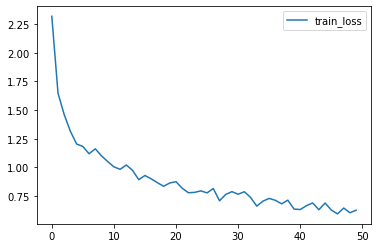

Text(0.5, 1.0, 'LOSS')

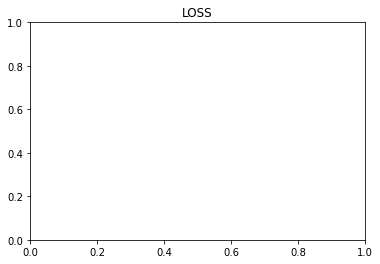

In [11]:
plt.plot(history.history["loss"], label = "train_loss")
#plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()
plt.title("LOSS")

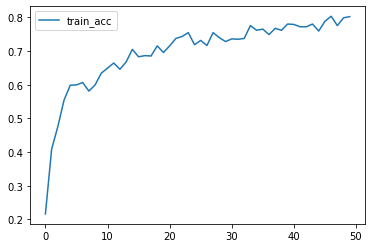

Text(0.5, 1.0, 'ACCURACY')

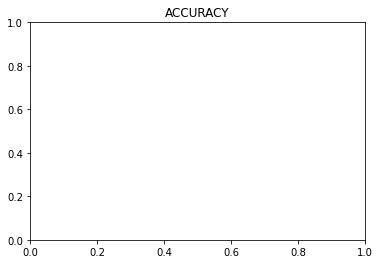

In [12]:
plt.plot(history.history["accuracy"], label = "train_acc")
#plt.plot(history.history["val_accuracy"], label = "val_acc")
plt.legend()
plt.show()
plt.title("ACCURACY")


In [13]:
model.save("dance5.h5")